In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_rewards(lrs, elements, algorithm, policy, discount, legend_lrs=True, legend_d=True):
    rewards = []
    _ = plt.subplots(1,1, figsize=(10,6))
    colors = ['darkorange', 'deeppink', 'turquoise']
    for j,d in enumerate(discount):
        for i,lr in enumerate(lrs):
            with open('rewards/reward_log_{}_{}_{}_{}_{}.pickle'.format(elements, policy, algorithm, d, lr), 'rb') as log:
                reward = pickle.load(log)
            rewards.append(np.max(reward))
            plt.plot(reward, alpha=0.4, color = colors[i+j])
            pos, lab = plt.yticks()
            #print(pos)
    plt.hlines(np.max(rewards), xmin=-1, xmax=4000, colors='red', linestyle='dashed')
    plt.yticks( [-0.4, -0.2,  0., 0.2,  0.4,  0.6,  0.8,] + [np.max(rewards)] )
    plt.xlabel('training episode')
    plt.ylabel('average reward')
    plt.title(f'Only {elements.capitalize()}, rewards per learning rate. Algorithm: {algorithm} + {policy}')
    if legend_lrs:
        plt.legend(lrs)
    if legend_d:
        plt.legend(discount)
    plt.grid()
    plt.tight_layout()
    plt.savefig('plots/rewards_{}_{}_{}_{}.png'.format(elements, policy, algorithm, discount))
    plt.show()

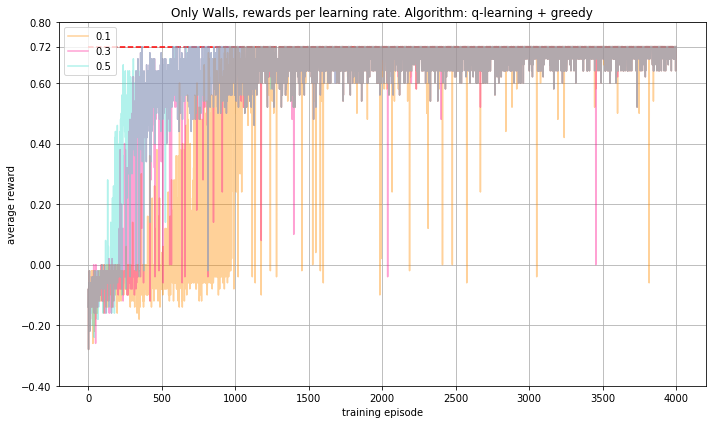

In [3]:
plot_rewards([0.1, 0.3, 0.5], 'walls', 'q-learning', 'greedy', [0.9], legend_d=False)

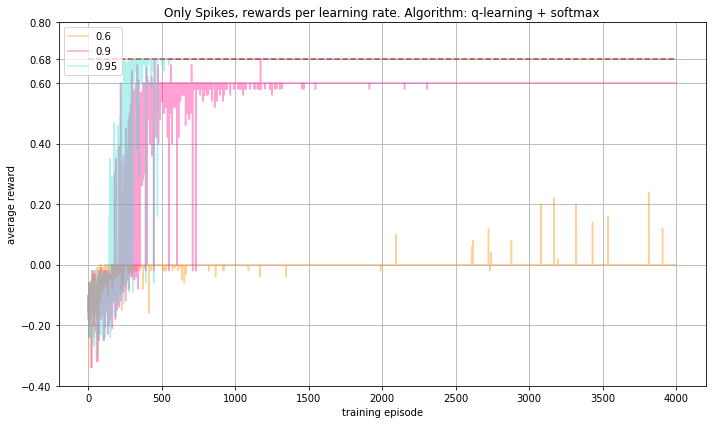

In [4]:
plot_rewards([0.5], 'spikes', 'q-learning', 'softmax', [0.6, 0.9, 0.95], legend_lrs=False)

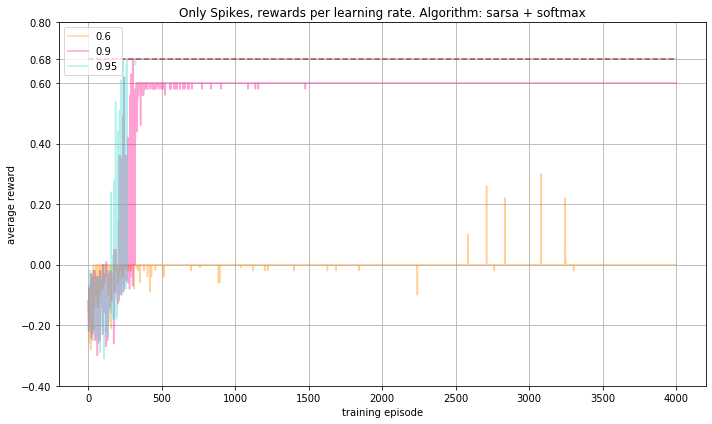

In [5]:
plot_rewards([0.5], 'spikes', 'sarsa', 'softmax', [0.6, 0.9, 0.95], legend_lrs=False)

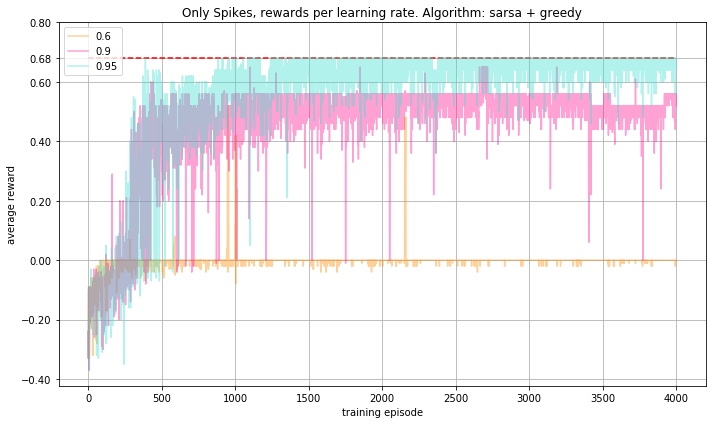

In [6]:
plot_rewards([0.5], 'spikes', 'sarsa', 'greedy', [0.6, 0.9, 0.95], legend_lrs=False)

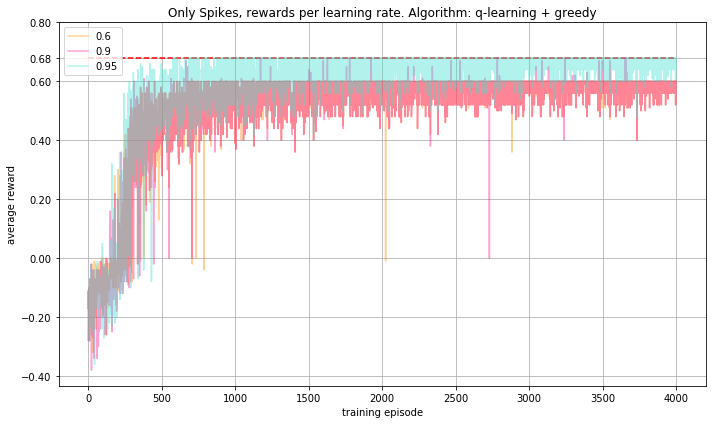

In [7]:
plot_rewards([0.5], 'spikes', 'q-learning', 'greedy', [0.6, 0.9, 0.95], legend_lrs=False)